In [ ]:
!pip install --upgrade --no-cache-dir --force-reinstall numpy==1.23.5 --only-binary=:all:

In [ ]:
!pip install opencv-python==4.9.0.80

In [1]:
!git clone https://github.com/foolwood/SiamMask.git
%cd SiamMask

Cloning into 'SiamMask'...
remote: Enumerating objects: 267, done.
remote: Total 267 (delta 0), reused 0 (delta 0), pack-reused 267 (from 1)
Receiving objects: 100% (267/267), 6.91 MiB | 27.09 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/kaggle/working/SiamMask


In [2]:
!bash make.sh

Compiling region.pyx because it changed.
[1/1] Cythonizing region.pyx
/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /kaggle/working/SiamMask/utils/pyvotkit/region.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
region.c: In function ‘__pyx_pw_6region_7Polygon_5__str__’:
region.c:9226:69: warning: ‘__pyx_v_i’ may be used uninitialized in this function []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wmaybe-uninitialized-Wmaybe-uninitialized]8;;]
 9226 |   __pyx_t_7 = PyFloat_FromDouble((__pyx_v_self->_c_region_polygon->x[__pyx_v_i])); if (unlikely(!__pyx_t_7)) __PYX_ERR(0, 141, __pyx_L1_error)
      |                                                                     ^
region.c:9118:8: note: ‘__pyx_v_i’ was declared here
 9118 |   long __pyx_v_i;
      |        ^~~~~~~~~
In file included from src/region.

In [3]:
!mkdir pretrained
!wget -P pretrained http://www.robots.ox.ac.uk/~qwang/SiamMask_VOT.pth
!wget -P pretrained http://www.robots.ox.ac.uk/~qwang/SiamMask_DAVIS.pth

--2025-02-04 11:57:52--  http://www.robots.ox.ac.uk/~qwang/SiamMask_VOT.pth
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~qwang/SiamMask_VOT.pth [following]
--2025-02-04 11:57:52--  https://www.robots.ox.ac.uk/~qwang/SiamMask_VOT.pth
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101533952 (97M)
Saving to: ‘pretrained/SiamMask_VOT.pth’

SiamMask_VOT.pth    100%[===================>]  96.83M  22.3MB/s    in 5.0s    

2025-02-04 11:57:58 (19.5 MB/s) - ‘pretrained/SiamMask_VOT.pth’ saved [101533952/101533952]

URL transformed to HTTPS due to an HSTS policy
--2025-02-04 11:57:58--  https://www.robots.ox.ac.uk/~qwang/SiamMask_DAVIS.pth
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129

In [5]:
import sys
sys.path.append('/kaggle/working/SiamMask/experiments/siammask_sharp')

In [6]:
import torch
import cv2
import numpy as np
from models.siammask import SiamMask
from experiments.siammask_sharp.custom import Custom


from utils.load_helper import load_pretrain
from utils.config_helper import load_config


class MyArgs:
    config = '/kaggle/working/SiamMask/experiments/siammask_sharp/config_davis.json'

cfg = load_config(MyArgs)

siammask = Custom(anchors=cfg['anchors'])
siammask = load_pretrain(siammask, "/kaggle/working/SiamMask/pretrained/SiamMask_DAVIS.pth")
siammask.eval().cuda()

/kaggle/working/SiamMask/utils/load_helper.py:36: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_dict = torch.load(pretrained_path, map_location=lambda storage, lo

Custom(
  (upSample): UpsamplingBilinear2d(size=[127, 127], mode='bilinear')
  (features): ResDown(
    (features): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, tra

In [7]:
import os
import cv2

frames_folder = "/kaggle/input/sportsmot/sportsmot_publish/dataset/val/v_i2_L4qquVg0_c006/img1"

frame_files = sorted([os.path.join(frames_folder, f) for f in os.listdir(frames_folder) if f.endswith(".jpg")])

print(f"Total frames found: {len(frame_files)}")

Total frames found: 888


In [27]:
from tools.test import *

device = 'cuda'

first_frame = cv2.imread(frame_files[0])

output_video_path = "tracking_output.mp4"
frame_size = cv2.imread(frame_files[0]).shape[1::-1]

video_writer = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), 25, frame_size)

obj_id = 14
x, y, w, h = 782, 549, 39, 106

target_pos = np.array([x + w / 2, y + h / 2])
target_sz = np.array([w, h])
state = siamese_init(first_frame, target_pos, target_sz, siammask, cfg['hp'], device=device)

tracking_results = []

for i, frame_path in enumerate(frame_files):
    frame = cv2.imread(frame_path)

    state = siamese_track(state, frame, mask_enable=True, refine_enable=True, device=device)

    w, h = state['target_sz']
    x, y = state['target_pos']
    x -= w/2
    y -= h/2
    tracking_results.append([x, y, w, h])
    
    x, y, w, h = map(int, (x, y, w, h))
    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    video_writer.write(frame)



video_writer.release()
print("Tracking complete.")

/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:150: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post0(F.upsample(self.h2(out) + self.v2(p2), size=(31, 31)))
/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:151: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post1(F.upsample(self.h1(out) + self.v1(p1), size=(61, 61)))
/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:152: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post2(F.upsample(self.h0(out) + self.v0(p0), size=(127, 127)))


Tracking complete.


In [28]:
import numpy as np
import cv2
import pandas as pd
import time

def iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[0] + boxA[2], boxB[0] + boxB[2])
    yB = min(boxA[1] + boxA[3], boxB[1] + boxB[3])

    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = boxA[2] * boxA[3]
    boxBArea = boxB[2] * boxB[3]

    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou

def precision(pred_boxes, gt_boxes, threshold=20):
    distances = []
    for pred, gt in zip(pred_boxes, gt_boxes):
        pred_center = (pred[0] + pred[2] / 2, pred[1] + pred[3] / 2)
        gt_center = (gt[0] + gt[2] / 2, gt[1] + gt[3] / 2)
        dist = np.linalg.norm(np.array(pred_center) - np.array(gt_center))
        distances.append(dist)
    
    return np.mean(np.array(distances) < threshold)

def success_rate(pred_boxes, gt_boxes, iou_threshold=0.5):
    ious = [iou(pred, gt) for pred, gt in zip(pred_boxes, gt_boxes)]
    return np.mean(np.array(ious) > iou_threshold)


In [29]:
def load_mot_gt(gt_file, obj_id):
    df = pd.read_csv(gt_file, header=None)
    df.columns = ["frame", "id", "x", "y", "w", "h", "conf", "class", "visibility"]

    df = df[df["id"] == obj_id]

    df = df.sort_values(by="frame")

    gt_boxes = df[["x", "y", "w", "h"]].values.tolist() 
    return gt_boxes


In [30]:
gt_boxes = load_mot_gt("/kaggle/input/sportsmot/sportsmot_publish/dataset/val/v_i2_L4qquVg0_c006/gt/gt.txt", obj_id)

In [31]:
def evaluate_sot(pred_boxes, gt_boxes):
    min_length = min(len(pred_boxes), len(gt_boxes))
    pred_boxes = pred_boxes[:min_length]  # Align lengths
    gt_boxes = gt_boxes[:min_length]

    success = success_rate(pred_boxes, gt_boxes)
    prec = precision(pred_boxes, gt_boxes)
    
    print(f"Success Rate (IoU Overlap): {success:.2f}")
    print(f"Precision (Center Distance < 20px): {prec:.2f}")

    return success, prec


In [32]:
evaluate_sot(tracking_results, gt_boxes)

Success Rate (IoU Overlap): 0.94
Precision (Center Distance < 20px): 1.00


(0.9384993849938499, 0.995079950799508)

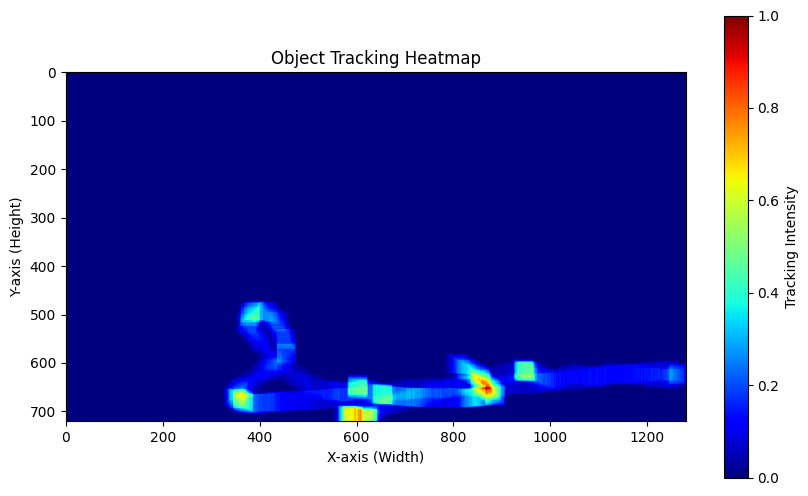

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

def generate_heatmap(pred_boxes, frame_size, point_radius=20):
    H, W = frame_size
    heatmap = np.zeros((H, W), dtype=np.float32)

    for box in pred_boxes:
        x, y, w, h = box
        center_x, center_y = int(x + w / 2), int(y + h / 2)

        if 0 <= center_x < W and 0 <= center_y < H:
            x_min, x_max = max(0, center_x - point_radius), min(W, center_x + point_radius)
            y_min, y_max = max(0, center_y - point_radius), min(H, center_y + point_radius)

            heatmap[y_min:y_max, x_min:x_max] += 1  


    heatmap /= heatmap.max()

    return heatmap

def visualize_heatmap(heatmap):
    plt.figure(figsize=(10, 6))
    plt.imshow(heatmap, cmap='jet', interpolation='nearest')
    plt.colorbar(label="Tracking Intensity")
    plt.title("Object Tracking Heatmap")
    plt.xlabel("X-axis (Width)")
    plt.ylabel("Y-axis (Height)")
    plt.show()

heatmap = generate_heatmap(tracking_results, (frame_size[1], frame_size[0]))

visualize_heatmap(heatmap)

In [38]:
import random

val_folder = "/kaggle/input/sportsmot/sportsmot_publish/dataset/val/"

video_list_file = "/kaggle/input/sportsmot/sportsmot_publish/splits_txt/football.txt"

with open(video_list_file, "r") as f:
    video_names = [line.strip() for line in f.readlines() if line.strip()]


selected_folders = [os.path.join(val_folder, v) for v in video_names if os.path.isdir(os.path.join(val_folder, v))]

num_test = 10

random.seed(42)
selected_folders = random.sample(selected_folders, num_test)

device = 'cuda'

metrics = np.zeros(2)

for video_folder in selected_folders:
    print(f"Processing video: {video_folder}")

    frames_folder = os.path.join(video_folder, "img1")
    gt_file = os.path.join(video_folder, "gt", "gt.txt")

    gt_data = pd.read_csv(gt_file, header=None)
    gt_data.columns = ["frame", "object_id", "x", "y", "w", "h", "conf", "class", "visibility"]

    first_frame_boxes = gt_data[gt_data["frame"] == 1]

    selected_box = first_frame_boxes.sample(n=1).iloc[0]
    obj_id = int(selected_box["object_id"])
    x, y, w, h = map(int, (selected_box["x"], selected_box["y"], selected_box["w"], selected_box["h"]))

    frame_files = sorted([os.path.join(frames_folder, f) for f in os.listdir(frames_folder) if f.endswith(".jpg")])

    print(f"Total frames found: {len(frame_files)}")

    first_frame = cv2.imread(frame_files[0])
    frame_size = first_frame.shape[1::-1]

    output_video_path = f"tracking_output_{os.path.basename(video_folder)}.mp4"
    video_writer = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), 25, frame_size)

    target_pos = np.array([x + w / 2, y + h / 2])
    target_sz = np.array([w, h])
    state = siamese_init(first_frame, target_pos, target_sz, siammask, cfg['hp'], device=device)

    tracking_results = []

    for i, frame_path in enumerate(frame_files):
        frame = cv2.imread(frame_path)

        state = siamese_track(state, frame, mask_enable=True, refine_enable=True, device=device)

        w, h = state['target_sz']
        x, y = state['target_pos']
        x -= w / 2
        y -= h / 2
        tracking_results.append([x, y, w, h])

        x, y, w, h = map(int, (x, y, w, h))
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        video_writer.write(frame)

    video_writer.release()
    print(f"Tracking complete for {video_folder}. Output saved as {output_video_path}")

    gt_boxes = load_mot_gt(gt_file, obj_id)

    metrics += evaluate_sot(tracking_results, gt_boxes)


metrics /= num_test

print(f"Mean Success Rate (IoU Overlap): {metrics[0]:.2f}")
print(f"Mean Precision (Center Distance < 20px): {metrics[1]:.2f}")

print("All tracking processes completed.")

Processing video: /kaggle/input/sportsmot/sportsmot_publish/dataset/val/v_dw7LOz17Omg_c067
Total frames found: 450


/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:150: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post0(F.upsample(self.h2(out) + self.v2(p2), size=(31, 31)))
/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:151: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post1(F.upsample(self.h1(out) + self.v1(p1), size=(61, 61)))
/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:152: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post2(F.upsample(self.h0(out) + self.v0(p0), size=(127, 127)))


Tracking complete for /kaggle/input/sportsmot/sportsmot_publish/dataset/val/v_dw7LOz17Omg_c067. Output saved as tracking_output_v_dw7LOz17Omg_c067.mp4
Success Rate (IoU Overlap): 0.65
Precision (Center Distance < 20px): 0.65
Processing video: /kaggle/input/sportsmot/sportsmot_publish/dataset/val/v_G-vNjfx1GGc_c004
Total frames found: 675


/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:150: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post0(F.upsample(self.h2(out) + self.v2(p2), size=(31, 31)))
/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:151: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post1(F.upsample(self.h1(out) + self.v1(p1), size=(61, 61)))
/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:152: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post2(F.upsample(self.h0(out) + self.v0(p0), size=(127, 127)))


Tracking complete for /kaggle/input/sportsmot/sportsmot_publish/dataset/val/v_G-vNjfx1GGc_c004. Output saved as tracking_output_v_G-vNjfx1GGc_c004.mp4
Success Rate (IoU Overlap): 0.98
Precision (Center Distance < 20px): 0.99
Processing video: /kaggle/input/sportsmot/sportsmot_publish/dataset/val/v_2QhNRucNC7E_c017
Total frames found: 450


/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:150: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post0(F.upsample(self.h2(out) + self.v2(p2), size=(31, 31)))
/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:151: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post1(F.upsample(self.h1(out) + self.v1(p1), size=(61, 61)))
/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:152: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post2(F.upsample(self.h0(out) + self.v0(p0), size=(127, 127)))


Tracking complete for /kaggle/input/sportsmot/sportsmot_publish/dataset/val/v_2QhNRucNC7E_c017. Output saved as tracking_output_v_2QhNRucNC7E_c017.mp4
Success Rate (IoU Overlap): 0.24
Precision (Center Distance < 20px): 0.28
Processing video: /kaggle/input/sportsmot/sportsmot_publish/dataset/val/v_i2_L4qquVg0_c006
Total frames found: 888


/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:150: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post0(F.upsample(self.h2(out) + self.v2(p2), size=(31, 31)))
/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:151: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post1(F.upsample(self.h1(out) + self.v1(p1), size=(61, 61)))
/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:152: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post2(F.upsample(self.h0(out) + self.v0(p0), size=(127, 127)))


Tracking complete for /kaggle/input/sportsmot/sportsmot_publish/dataset/val/v_i2_L4qquVg0_c006. Output saved as tracking_output_v_i2_L4qquVg0_c006.mp4
Success Rate (IoU Overlap): 0.08
Precision (Center Distance < 20px): 0.10
Processing video: /kaggle/input/sportsmot/sportsmot_publish/dataset/val/v_G-vNjfx1GGc_c601
Total frames found: 481


/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:150: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post0(F.upsample(self.h2(out) + self.v2(p2), size=(31, 31)))
/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:151: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post1(F.upsample(self.h1(out) + self.v1(p1), size=(61, 61)))
/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:152: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post2(F.upsample(self.h0(out) + self.v0(p0), size=(127, 127)))


Tracking complete for /kaggle/input/sportsmot/sportsmot_publish/dataset/val/v_G-vNjfx1GGc_c601. Output saved as tracking_output_v_G-vNjfx1GGc_c601.mp4
Success Rate (IoU Overlap): 0.71
Precision (Center Distance < 20px): 0.71
Processing video: /kaggle/input/sportsmot/sportsmot_publish/dataset/val/v_G-vNjfx1GGc_c600
Total frames found: 500


/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:150: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post0(F.upsample(self.h2(out) + self.v2(p2), size=(31, 31)))
/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:151: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post1(F.upsample(self.h1(out) + self.v1(p1), size=(61, 61)))
/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:152: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post2(F.upsample(self.h0(out) + self.v0(p0), size=(127, 127)))


Tracking complete for /kaggle/input/sportsmot/sportsmot_publish/dataset/val/v_G-vNjfx1GGc_c600. Output saved as tracking_output_v_G-vNjfx1GGc_c600.mp4
Success Rate (IoU Overlap): 0.11
Precision (Center Distance < 20px): 0.14
Processing video: /kaggle/input/sportsmot/sportsmot_publish/dataset/val/v_dw7LOz17Omg_c053
Total frames found: 550


/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:150: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post0(F.upsample(self.h2(out) + self.v2(p2), size=(31, 31)))
/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:151: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post1(F.upsample(self.h1(out) + self.v1(p1), size=(61, 61)))
/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:152: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post2(F.upsample(self.h0(out) + self.v0(p0), size=(127, 127)))


Tracking complete for /kaggle/input/sportsmot/sportsmot_publish/dataset/val/v_dw7LOz17Omg_c053. Output saved as tracking_output_v_dw7LOz17Omg_c053.mp4
Success Rate (IoU Overlap): 0.20
Precision (Center Distance < 20px): 0.21
Processing video: /kaggle/input/sportsmot/sportsmot_publish/dataset/val/v_G-vNjfx1GGc_c008
Total frames found: 480


/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:150: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post0(F.upsample(self.h2(out) + self.v2(p2), size=(31, 31)))
/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:151: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post1(F.upsample(self.h1(out) + self.v1(p1), size=(61, 61)))
/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:152: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post2(F.upsample(self.h0(out) + self.v0(p0), size=(127, 127)))


Tracking complete for /kaggle/input/sportsmot/sportsmot_publish/dataset/val/v_G-vNjfx1GGc_c008. Output saved as tracking_output_v_G-vNjfx1GGc_c008.mp4
Success Rate (IoU Overlap): 0.29
Precision (Center Distance < 20px): 0.29
Processing video: /kaggle/input/sportsmot/sportsmot_publish/dataset/val/v_ITo3sCnpw_k_c007
Total frames found: 701


/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:150: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post0(F.upsample(self.h2(out) + self.v2(p2), size=(31, 31)))
/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:151: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post1(F.upsample(self.h1(out) + self.v1(p1), size=(61, 61)))
/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:152: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post2(F.upsample(self.h0(out) + self.v0(p0), size=(127, 127)))


Tracking complete for /kaggle/input/sportsmot/sportsmot_publish/dataset/val/v_ITo3sCnpw_k_c007. Output saved as tracking_output_v_ITo3sCnpw_k_c007.mp4
Success Rate (IoU Overlap): 0.16
Precision (Center Distance < 20px): 0.17
Processing video: /kaggle/input/sportsmot/sportsmot_publish/dataset/val/v_i2_L4qquVg0_c007
Total frames found: 451


/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:150: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post0(F.upsample(self.h2(out) + self.v2(p2), size=(31, 31)))
/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:151: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post1(F.upsample(self.h1(out) + self.v1(p1), size=(61, 61)))
/kaggle/working/SiamMask/experiments/siammask_sharp/custom.py:152: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  out = self.post2(F.upsample(self.h0(out) + self.v0(p0), size=(127, 127)))


Tracking complete for /kaggle/input/sportsmot/sportsmot_publish/dataset/val/v_i2_L4qquVg0_c007. Output saved as tracking_output_v_i2_L4qquVg0_c007.mp4
Success Rate (IoU Overlap): 1.00
Precision (Center Distance < 20px): 1.00
Mean Success Rate (IoU Overlap): 0.44
Mean Precision (Center Distance < 20px): 0.46
All tracking processes completed.
